# Aim of this code  is to classification of images

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# below line will tell You that Your Computer has GPU or not
# if it has GPU then u have to install Cuda Toolkit and CuDNN

In [2]:
tf.config.experimental.list_physical_devices()  

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# tensor flow is built with Cuda that is showing True

In [3]:
tf.test.is_built_with_cuda()

True

# load the Datasets from keras  of CIFAR10

# CIFAR-10 dataset consists of 60000 32*32  colour images in 10 classes

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()


# here classes are:

# Label	Description
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck


In [20]:
y_train.shape # 50000 train sample

(50000, 1)

In [21]:
x_train.shape # x and y demension are 32 ,32  third demension is RGb color

(50000, 32, 32, 3)

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [22]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index]) # imshow is image show function

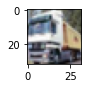

In [9]:
plot_sample(1)

In [10]:
label = ["airplane","autoplane","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
y_train[4]

array([1], dtype=uint8)

In [12]:
label[y_train[4][0]]

'autoplane'

# normalizing the image between RANGE 0 and 1 
# It help to train your deep learning model

In [13]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [14]:
x_train_scaled.shape # shape remain same

(50000, 32, 32, 3)

# Now   we will do one-hot encode with keras API


In [15]:
y_train_categorical = keras.utils.to_categorical(
y_train,num_classes=10,dtype = "float32"
)
y_train_categorical[:5]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_test_categorical = keras.utils.to_categorical(
y_test,num_classes=10,dtype = "float32"
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)), # this flatten layer will be flatten into 3072 of size
    keras.layers.Dense(3000,activation="relu"), # hidden layer
    keras.layers.Dense(3000,activation="relu"), # hidden layer 
    keras.layers.Dense(10,activation="sigmoid")
])

In [18]:
model.compile(optimizer="adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [19]:
model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 100s 61ms/step - loss: 1.8864 - accuracy: 0.3280
Epoch 2/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6610 - accuracy: 0.4026
Epoch 3/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5819 - accuracy: 0.4325
Epoch 4/50
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5322 - accuracy: 0.4506
Epoch 5/50
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4936 - accuracy: 0.4658
Epoch 6/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4628 - accuracy: 0.4770
Epoch 7/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4312 - accuracy: 0.4872
Epoch 8/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4067 - accuracy: 0.4969
Epoch 9/50
1563/1563 [==============================] - 98s 62ms/step - loss: 1.3878 - accuracy: 0.5036
Epoch 10/50
1563/1563 [==============================] - 

#  now someprediction

In [23]:
model.predict(x_test_scaled)[0] # here we have ten classes you got the Probability of the classes

array([0.02785456, 0.00291809, 0.02669382, 0.31645632, 0.0181731 ,
       0.0288206 , 0.00866875, 0.00233755, 0.09068534, 0.00347129],
      dtype=float32)

# now You want index of maximun number so You can use np.argmax function of numpy

In [26]:
label[np.argmax(model.predict(x_test_scaled)[0])]

'cat'

In [28]:
label[y_test[0][0]]

'cat'